In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE


import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NNdbr_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 107), (467, 274), (467, 577), (467, 1066))

In [25]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [26]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [27]:
for i in tab.keys():
    print(i+"; ",end="")

Br1scC3as; C1dcC2dc; C1scC2sc; C1scC3as; C1scC3dc; C1scC4sc; C1scC4ss; C1scN2sc; C1scN3as; C1scN3sc; C1scO2sc; C1scS2sc; C1scS3dc; C1scS4wc; C2arC2ar; C2arC3as; C2arN2ar; C2arN3as; C2arO2ar; C2arS2ar; C2dcC2sc; C2dcC3as; C2dcO1dc; C2drC2sr; C2drC3ds; C2drC4ss; C2scC2sc; C2scC2tc; C2scC3as; C2scC3dc; C2scC4sc; C2scC4ss; C2scF1sc; C2scN1sc; C2scN2sc; C2scN3as; C2scN3sc; C2scO1sc; C2scO2sc; C2scS2sc; C2scS4wc; C2srC2sr; C2srC3as; C2srC3ds; C2srC3ss; C2srC4ss; C2srO2sr; C2srS2sr; C2tcC3as; C2tcN1tc; C3asC3as; C3asC3dc; C3asC3ds; C3asC3sc; C3asC3ss; C3asC4sc; C3asCl1sc; C3asF1sc; C3asN1sc; C3asN2ar; C3asN2sc; C3asN3as; C3asN3dc; C3asN3sc; C3asO1sc; C3asO2ar; C3asO2sc; C3asO2sr; C3asS2ar; C3asS2sc; C3asS2sr; C3asS3dc; C3asS4wc; C3dcC4sc; C3dcN1sc; C3dcN2sc; C3dcO1dc; C3dcO1sc; C3dcO2sc; C3dsC3ds; C3dsN2dr; C3dsS2sr; C3scC4sc; C3scF1sc; C3scO1sc; C3scO2sc; C3ssC3ss; C3ssF1sc; C3ssN2dr; C3ssN3as; C3ssS2sr; C4scC4ss; C4scF1sc; C4scO2sc; C4scS4wc; N1scO2sc; N1scS4wc; N2arN2ar; N2arN3as; N2arO2ar

In [28]:
rnd.seed(0)

In [29]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 2024)

In [30]:
tab.head()

,Br1scC3as,C1dcC2dc,C1scC2sc,C1scC3as,C1scC3dc,C1scC4sc,C1scC4ss,C1scN2sc,C1scN3as,C1scN3sc,...,N3asN2arC2arC3asS4wc,N3asN2arC3asC2scO1sc,N3asN2arC3asC2scO2sc,N3asN2arC3asC3asO1sc,N3asN2arC3asC3asO2sc,N3asN2arC3asC3asS2ar,N3asN2arC3asC3dcO1dc,N3asN2arC3asC3dcO1sc,N3asN2arC3asC3dcO2sc,S2arC3asC3ssC3ssS2sr
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [32]:
y = np.array(y)

In [33]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [34]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [35]:
X = np.array(tab)

In [36]:
X = TfidfTransformer().fit_transform(X)

In [37]:
X = X.todense()

In [38]:
my_pca = PCA(20)

In [39]:
X_pca = my_pca.fit_transform(X)

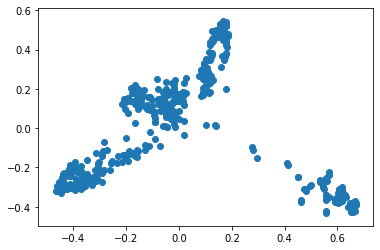

In [40]:
plt.scatter(X_pca[:,0], X_pca[:,1])


In [41]:
my_tsne = TSNE()
X_tsne = my_tsne.fit_transform(X)

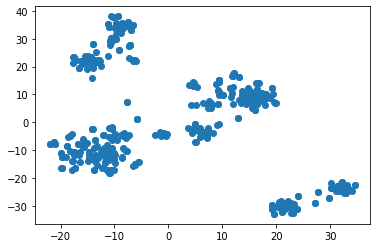

In [42]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# AGGL


In [76]:
aggl = AgglomerativeClustering(n_clusters=7, linkage="complete", affinity="cosine")

In [77]:
res = aggl.fit_predict(X_tsne)
cluster_structure = res

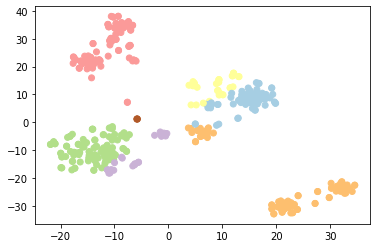

In [78]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

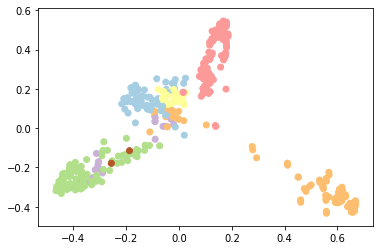

In [79]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [80]:
silhouette_score(X,res)

0.13633831706228536

In [81]:
mdl = Ridge(3)

In [82]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 78

MSE 1534.7247

MAE 32.2372

\(R^2\) 0.0225

\bigskip

Значения ошибок на 2-ом кластере размера 119

MSE 898.2617

MAE 20.2616

\(R^2\) 0.0863

\bigskip

Значения ошибок на 3-ом кластере размера 106

MSE 855.4287

MAE 18.1395

\(R^2\) 0.0168

\bigskip

Значения ошибок на 4-ом кластере размера 100

MSE 663.8516

MAE 13.7635

\(R^2\) -0.0316

\bigskip

Значения ошибок на 5-ом кластере размера 25

MSE 1359.968

MAE 29.4434

\(R^2\) 0.2329

\bigskip

Значения ошибок на 6-ом кластере размера 36

MSE 1388.6744

MAE 31.4506

\(R^2\) 0.0393

\bigskip

Значения ошибок на 7-ом кластере размера 3

MSE 0.0335

MAE 0.1582

\(R^2\) -1.1835

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1001.0

MAE 21.6136

\(R^2\) 0.0863

\bigskip


# AGGL

In [83]:
aggl = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="manhattan")

In [84]:
res = aggl.fit_predict(X)
cluster_structure = res

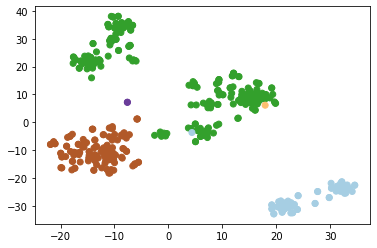

In [86]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

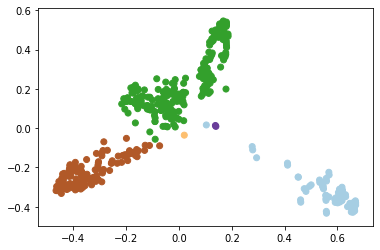

In [87]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [88]:
silhouette_score(X,res)

0.1509072811004872

In [90]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    if X_in_clust.shape[0] == 1:
        continue
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 78

MSE 519.0265

MAE 10.8979

\(R^2\) -0.0759

\bigskip

Значения ошибок на 2-ом кластере размера 248

MSE 1239.4402

MAE 27.3444

\(R^2\) 0.1014

\bigskip

Значения ошибок на 3-ом кластере размера 2

MSE 0.0005

MAE 0.022

\(R^2\) -3.0

\bigskip

Значения ошибок на 4-ом кластере размера 138

MSE 823.1442

MAE 18.1465

\(R^2\) 0.0524

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 990.0

MAE 21.7505

\(R^2\) 0.098

\bigskip


# DBSCAN

In [91]:
dbscan = DBSCAN(eps=0.04, min_samples=7, metric="cosine")

In [92]:
res = dbscan.fit_predict(X_tsne)
cluster_structure = res

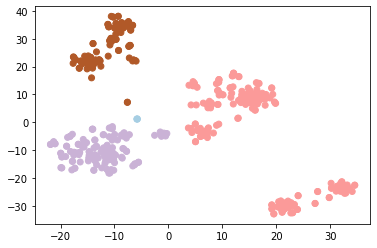

In [93]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

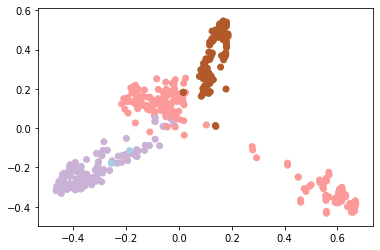

In [94]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [95]:
silhouette_score(X,res)

0.10305388910517926

In [96]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    if X_in_clust.shape[0] == 1:
        continue
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 214

MSE 1122.1079

MAE 24.183

\(R^2\) 0.0485

\bigskip

Значения ошибок на 2-ом кластере размера 144

MSE 953.4561

MAE 21.248

\(R^2\) 0.1623

\bigskip

Значения ошибок на 3-ом кластере размера 106

MSE 855.4287

MAE 18.1395

\(R^2\) 0.0168

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 1009.0

MAE 21.8915

\(R^2\) 0.0843

\bigskip


# DBSCAN

In [225]:
dbscan = DBSCAN(eps=0.83, min_samples=3, metric="euclidean")

In [226]:
res = dbscan.fit_predict(X)
cluster_structure = res

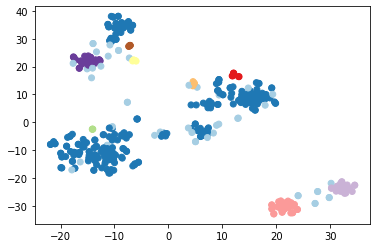

In [227]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=res, cmap=plt.cm.Paired)

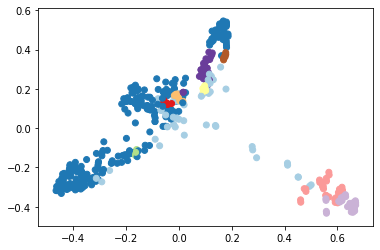

In [228]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=res, cmap=plt.cm.Paired)

In [229]:
silhouette_score(X,res)

0.11525922320238854

In [230]:
y_new = []
ans_all = []
iterat = 1 
for i in np.unique(cluster_structure):
    if i == -1:
        continue
    X_in_clust = X[np.where(res==i)[0],:]
    y_in_clust = y[np.where(res==i)[0],0]
    if X_in_clust.shape[0] == 1:
        continue
    ans = []
    
    for train_index, test_index in KFold(min(10, X_in_clust.shape[0])).split(X_in_clust):
        
        
        X_train = X_in_clust[train_index, :]
        y_train = y_in_clust[train_index]

        X_test = X_in_clust[test_index, :]
        y_test = y_in_clust[test_index]
        
        
        mdl.fit(X_train, y_train)
        for j in mdl.predict(X_test):
            ans.append(j)
        for j in mdl.predict(X_test):
            ans_all.append(j)
        for j in y_test:
            y_new.append(j)
    print ("Значения ошибок на " + str(iterat) + "-ом кластере размера " + str(X_in_clust.shape[0]))
    print()
    print("MSE " + str(round(MSE(ans,y_in_clust[:]),4)))
    print()
    print("MAE " + str(round(MAE(ans,y_in_clust[:]),4)))
    print()
    print("\\(R^2\\) " + str(round(r2_score(y_in_clust[:], ans),4)))
    print()
    print("\\bigskip")
    print()
    iterat+=1
print("\\bigskip")
print()
print("\\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}")
print()
print("MSE " + str(round(MSE(ans_all,y_new[:]))))
print()
print("MAE " + str(round(MAE(ans_all,y_new[:]),4)))
print()
print("\\(R^2\\) " + str(round(r2_score(y_new[:], ans_all),4)))
print()
print("\\bigskip")

Значения ошибок на 1-ом кластере размера 292

MSE 1005.3651

MAE 22.2064

\(R^2\) 0.0631

\bigskip

Значения ошибок на 2-ом кластере размера 3

MSE 193.0776

MAE 13.1448

\(R^2\) -1.2829

\bigskip

Значения ошибок на 3-ом кластере размера 37

MSE 716.1103

MAE 14.1752

\(R^2\) -0.1145

\bigskip

Значения ошибок на 4-ом кластере размера 7

MSE 1654.2157

MAE 28.2883

\(R^2\) -0.3661

\bigskip

Значения ошибок на 5-ом кластере размера 7

MSE 419.9416

MAE 17.8792

\(R^2\) -0.3584

\bigskip

Значения ошибок на 6-ом кластере размера 31

MSE 330.8144

MAE 5.9561

\(R^2\) -0.06

\bigskip

Значения ошибок на 7-ом кластере размера 32

MSE 343.5998

MAE 7.7797

\(R^2\) -0.0655

\bigskip

Значения ошибок на 8-ом кластере размера 6

MSE 0.0479

MAE 0.2019

\(R^2\) -0.3791

\bigskip

Значения ошибок на 9-ом кластере размера 6

MSE 0.0023

MAE 0.0444

\(R^2\) -0.4324

\bigskip

\bigskip

\textbf{ИТОГОВЫЕ ОШИБКИ НА ВСЕЙ ВЫБОРКЕ:}

MSE 847.0

MAE 18.5426

\(R^2\) 0.055

\bigskip
